In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [49]:
df = pd.read_csv("raw_data/bank_test.csv")
df

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,40000,26.0,self-employed,single,tertiary,Porto,no,-101.0,no,yes,cellular,29,jan,172,1.0,-1,0.0,unknown
1,40001,47.0,technician,married,secondary,NaN,no,1167.0,yes,no,cellular,2,feb,139,3.0,73,2.0,success
2,40002,35.0,self-employed,married,tertiary,NaN,no,2427.0,no,no,cellular,12,jul,210,3.0,158,7.0,other
3,40003,54.0,technician,divorced,secondary,NaN,no,NaN,no,no,cellular,30,jan,86,1.0,-1,0.0,unknown
4,40004,27.0,blue-collar,single,secondary,Braga,no,-208.0,yes,n,unknown,21,may,127,2.0,-1,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,45206,38.0,administrator,married,secondary,NaN,no,1767.0,yes,no,cellular,12,nov,893,7.0,-1,0.0,unknown
5207,45207,39.0,housemaid,married,primary,Lisboa,no,562.0,no,no,cellular,12,aug,234,2.0,-1,0.0,unknown
5208,45208,46.0,technician,married,secondary,Amadora,no,0.0,no,no,unknown,20,jun,625,1.0,-1,0.0,unknown
5209,45209,NaN,technician,single,secondary,Braga,no,1195.0,yes,no,cellular,19,nov,187,6.0,188,9.0,failure


In [50]:
#função que determina outliers
#(https://medium.com/@prashant.nair2050/hands-on-outlier-detection-and-treatment-in-python-using-1-5-iqr-rule-f9ff1961a414)
def outlier_treatment(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.percentile(datacolumn , [25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range, upper_range

###Limpeza de Id, Location e Age

In [51]:
df1 = df.copy()
df1

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,40000,26.0,self-employed,single,tertiary,Porto,no,-101.0,no,yes,cellular,29,jan,172,1.0,-1,0.0,unknown
1,40001,47.0,technician,married,secondary,NaN,no,1167.0,yes,no,cellular,2,feb,139,3.0,73,2.0,success
2,40002,35.0,self-employed,married,tertiary,NaN,no,2427.0,no,no,cellular,12,jul,210,3.0,158,7.0,other
3,40003,54.0,technician,divorced,secondary,NaN,no,NaN,no,no,cellular,30,jan,86,1.0,-1,0.0,unknown
4,40004,27.0,blue-collar,single,secondary,Braga,no,-208.0,yes,n,unknown,21,may,127,2.0,-1,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,45206,38.0,administrator,married,secondary,NaN,no,1767.0,yes,no,cellular,12,nov,893,7.0,-1,0.0,unknown
5207,45207,39.0,housemaid,married,primary,Lisboa,no,562.0,no,no,cellular,12,aug,234,2.0,-1,0.0,unknown
5208,45208,46.0,technician,married,secondary,Amadora,no,0.0,no,no,unknown,20,jun,625,1.0,-1,0.0,unknown
5209,45209,NaN,technician,single,secondary,Braga,no,1195.0,yes,no,cellular,19,nov,187,6.0,188,9.0,failure


In [52]:
#remoção da coluna 'location' e 'id'
df1 = df1.drop("location", axis=1)
df1 = df1.drop("id", axis=1)

In [53]:
#determinando os outliers de 'age'
df_temp = df1.copy()
df_temp = df1['age'].dropna()
lower_range, upper_range = outlier_treatment(df_temp)
print(lower_range, upper_range)

9.0 73.0


In [54]:
#remoção dos outliers de 'age'
df1 = df1[(df1["age"] < upper_range) | (df1['age'].isna())]
df1 = df1[(df1["age"] > lower_range) | (df1['age'].isna())]

In [55]:
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4999.000000,4920.000000,5165.000000,5165.000000,4979.000000,5165.000000,5126.000000
mean,40.772154,1365.641463,15.694288,471.724298,2.853384,38.931462,0.532969
std,9.985939,3101.933319,8.274464,4031.269842,3.481252,99.076645,1.939571
min,18.000000,-2093.000000,1.000000,-20.000000,1.000000,-1.000000,0.000000
25%,33.000000,68.000000,8.000000,100.000000,1.000000,-1.000000,0.000000
50%,39.000000,427.000000,16.000000,176.000000,2.000000,-1.000000,0.000000
75%,49.000000,1440.500000,21.000000,311.000000,3.000000,-1.000000,0.000000
max,72.000000,71188.000000,31.000000,75000.000000,63.000000,842.000000,51.000000


In [56]:
df1 #471 colunas removidas

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26.0,self-employed,single,tertiary,no,-101.0,no,yes,cellular,29,jan,172,1.0,-1,0.0,unknown
1,47.0,technician,married,secondary,no,1167.0,yes,no,cellular,2,feb,139,3.0,73,2.0,success
2,35.0,self-employed,married,tertiary,no,2427.0,no,no,cellular,12,jul,210,3.0,158,7.0,other
3,54.0,technician,divorced,secondary,no,NaN,no,no,cellular,30,jan,86,1.0,-1,0.0,unknown
4,27.0,blue-collar,single,secondary,no,-208.0,yes,n,unknown,21,may,127,2.0,-1,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,38.0,administrator,married,secondary,no,1767.0,yes,no,cellular,12,nov,893,7.0,-1,0.0,unknown
5207,39.0,housemaid,married,primary,no,562.0,no,no,cellular,12,aug,234,2.0,-1,0.0,unknown
5208,46.0,technician,married,secondary,no,0.0,no,no,unknown,20,jun,625,1.0,-1,0.0,unknown
5209,NaN,technician,single,secondary,no,1195.0,yes,no,cellular,19,nov,187,6.0,188,9.0,failure


###Substituição simples nas colunas housing, loan, default, monhts, y


In [57]:
#substituindo 'sim' e 'não' pelos valores inteiros 1 e 0 para facilitar a manipulação dos dados
df2 = df1.copy()
for col in df2:
  df2[col] = df2[col].replace({'yes': np.int16(1), 'no': np.int16(0), 'y': np.int16(1), 'n': np.int16(0)})

C:\Users\chase\AppData\Local\Temp\ipykernel_3244\1315240840.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[col] = df2[col].replace({'yes': np.int16(1), 'no': np.int16(0), 'y': np.int16(1), 'n': np.int16(0)})


In [58]:
#trocar os nomes dos meses ('jan', 'feb', etc.) pela sua respectiva posição no ano
# months = {'aug': 8,'may': 5,'oct': 10,'nov': 11,'jul': 7,'jun': 6,'apr': 4,'jan': 1,'feb': 2,'sep': 9,'mar': 3,'dec': 12}
# df2["month"] = df2["month"].replace(months)
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26.0,self-employed,single,tertiary,0,-101.0,0,1,cellular,29,jan,172,1.0,-1,0.0,unknown
1,47.0,technician,married,secondary,0,1167.0,1,0,cellular,2,feb,139,3.0,73,2.0,success
2,35.0,self-employed,married,tertiary,0,2427.0,0,0,cellular,12,jul,210,3.0,158,7.0,other
3,54.0,technician,divorced,secondary,0,NaN,0,0,cellular,30,jan,86,1.0,-1,0.0,unknown
4,27.0,blue-collar,single,secondary,0,-208.0,1,0,unknown,21,may,127,2.0,-1,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,38.0,administrator,married,secondary,0,1767.0,1,0,cellular,12,nov,893,7.0,-1,0.0,unknown
5207,39.0,housemaid,married,primary,0,562.0,0,0,cellular,12,aug,234,2.0,-1,0.0,unknown
5208,46.0,technician,married,secondary,0,0.0,0,0,unknown,20,jun,625,1.0,-1,0.0,unknown
5209,NaN,technician,single,secondary,0,1195.0,1,0,cellular,19,nov,187,6.0,188,9.0,failure


###Limpeza de Balance* 

In [59]:
#talvez de problema/aplicando escala logarítima em balance -> deu problema
# balance_log = np.log(df2["balance"]/10+1)
# sns.histplot(balance_log)
# plt.show()

In [60]:
#aplicando escala logarítima para remover outliers de balance
# df2['balance'] = balance_log

In [61]:
#determinando os outliers de 'balance'
df_temp = df2.copy()
df_temp = df2['balance'].dropna()
lower_range, upper_range = outlier_treatment(df_temp)
upper_range = 20000 #considerando um upper_range menor para remover menos casas
print(lower_range, upper_range)

-1990.75 20000


In [62]:
#remoção dos outliers do balanço
df2 = df2.copy()
df2 = df2[(df2['balance'] < upper_range) | (df2['balance'].isna())]
df2 = df2[(df2['balance'] > lower_range) | (df2['balance'].isna())]
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26.0,self-employed,single,tertiary,0,-101.0,0,1,cellular,29,jan,172,1.0,-1,0.0,unknown
1,47.0,technician,married,secondary,0,1167.0,1,0,cellular,2,feb,139,3.0,73,2.0,success
2,35.0,self-employed,married,tertiary,0,2427.0,0,0,cellular,12,jul,210,3.0,158,7.0,other
3,54.0,technician,divorced,secondary,0,NaN,0,0,cellular,30,jan,86,1.0,-1,0.0,unknown
4,27.0,blue-collar,single,secondary,0,-208.0,1,0,unknown,21,may,127,2.0,-1,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,38.0,administrator,married,secondary,0,1767.0,1,0,cellular,12,nov,893,7.0,-1,0.0,unknown
5207,39.0,housemaid,married,primary,0,562.0,0,0,cellular,12,aug,234,2.0,-1,0.0,unknown
5208,46.0,technician,married,secondary,0,0.0,0,0,unknown,20,jun,625,1.0,-1,0.0,unknown
5209,NaN,technician,single,secondary,0,1195.0,1,0,cellular,19,nov,187,6.0,188,9.0,failure


###Limpeza de Duration*

In [63]:
#determinando os outliers de 'duration'
df_temp = df2.copy()
df_temp = df2['duration'].dropna()
lower_range, upper_range = outlier_treatment(df_temp)
print(lower_range, upper_range)
upper_range = 4000 #um upper_range menor que remove menos casas

-217.25 628.75


In [64]:
#remoção dos outliers da feature duration
df3 = df2.copy()
df3 = df3[(df3['duration'] < upper_range) | (df3['duration'].isna())]
df3 = df3[(df3['duration'] > lower_range) | (df3['duration'].isna())]
df3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26.0,self-employed,single,tertiary,0,-101.0,0,1,cellular,29,jan,172,1.0,-1,0.0,unknown
1,47.0,technician,married,secondary,0,1167.0,1,0,cellular,2,feb,139,3.0,73,2.0,success
2,35.0,self-employed,married,tertiary,0,2427.0,0,0,cellular,12,jul,210,3.0,158,7.0,other
3,54.0,technician,divorced,secondary,0,NaN,0,0,cellular,30,jan,86,1.0,-1,0.0,unknown
4,27.0,blue-collar,single,secondary,0,-208.0,1,0,unknown,21,may,127,2.0,-1,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,38.0,administrator,married,secondary,0,1767.0,1,0,cellular,12,nov,893,7.0,-1,0.0,unknown
5207,39.0,housemaid,married,primary,0,562.0,0,0,cellular,12,aug,234,2.0,-1,0.0,unknown
5208,46.0,technician,married,secondary,0,0.0,0,0,unknown,20,jun,625,1.0,-1,0.0,unknown
5209,NaN,technician,single,secondary,0,1195.0,1,0,cellular,19,nov,187,6.0,188,9.0,failure


In [65]:
#talvez de problema/aplicando escala logarítima em duration para remover outliers-> deu
# duration_log = np.log(df3["duration"]/10)
# sns.histplot(duration_log)
# plt.show()

In [66]:
# df3['duration'] = duration_log

###Limpeza de Campaign

In [67]:
#determinando os outliers de 'campaign'
df_temp = df3.copy()
df_temp = df3['campaign'].dropna()
lower_range, upper_range = outlier_treatment(df_temp)
print(lower_range, upper_range)
upper_range = 18 #um upper_range menor para remover menos casas

-2.0 6.0


In [68]:
#remoção dos outliers da feature 'campaign'
df3_5 = df3.copy()
df3_5 = df3_5[(df3_5['campaign'] < upper_range) | (df3_5['campaign'].isna())]
df3_5 = df3_5[(df3_5['campaign'] > lower_range) | (df3_5['campaign'].isna())]
df3_5

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26.0,self-employed,single,tertiary,0,-101.0,0,1,cellular,29,jan,172,1.0,-1,0.0,unknown
1,47.0,technician,married,secondary,0,1167.0,1,0,cellular,2,feb,139,3.0,73,2.0,success
2,35.0,self-employed,married,tertiary,0,2427.0,0,0,cellular,12,jul,210,3.0,158,7.0,other
3,54.0,technician,divorced,secondary,0,NaN,0,0,cellular,30,jan,86,1.0,-1,0.0,unknown
4,27.0,blue-collar,single,secondary,0,-208.0,1,0,unknown,21,may,127,2.0,-1,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,38.0,administrator,married,secondary,0,1767.0,1,0,cellular,12,nov,893,7.0,-1,0.0,unknown
5207,39.0,housemaid,married,primary,0,562.0,0,0,cellular,12,aug,234,2.0,-1,0.0,unknown
5208,46.0,technician,married,secondary,0,0.0,0,0,unknown,20,jun,625,1.0,-1,0.0,unknown
5209,NaN,technician,single,secondary,0,1195.0,1,0,cellular,19,nov,187,6.0,188,9.0,failure


###Transformação de 'pdays' e 'previous' em categóricas

In [69]:
df4 = df3_5.copy()
df4["pdays"] = df4['pdays'].apply(lambda x: 0 if x < 50 else 1) #0 se pdays < 50 e 1 se pdays >= 50
df4["previous"] = df4['previous'].apply(lambda x: 0 if x < 8 else 1) #0 se previous < 8 e 1 se previous >= 8

###Plotagem de gráficos para conferir resultados da limpeza

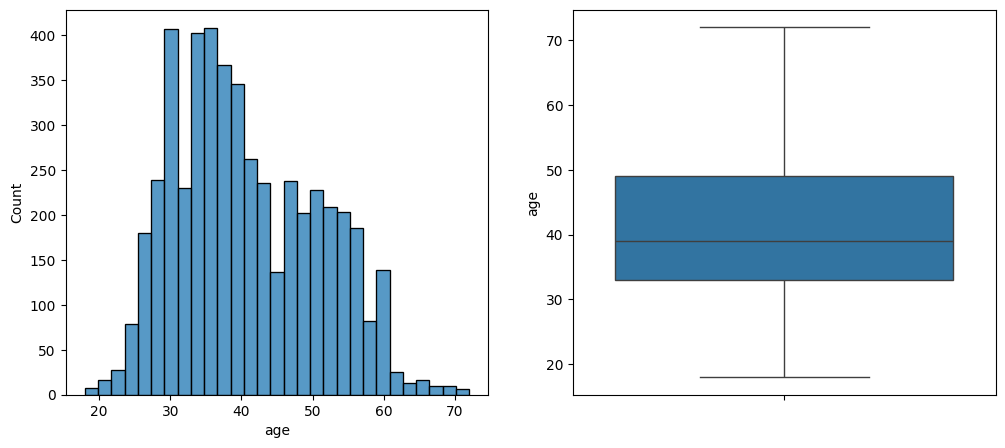

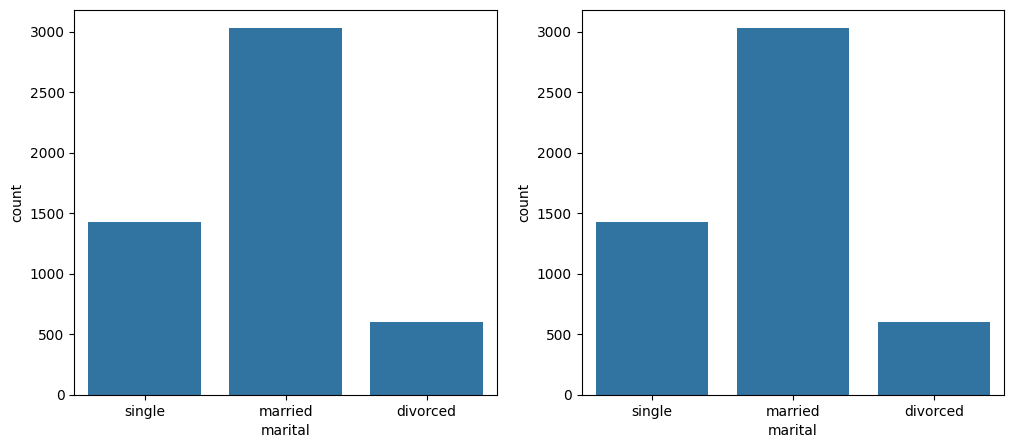

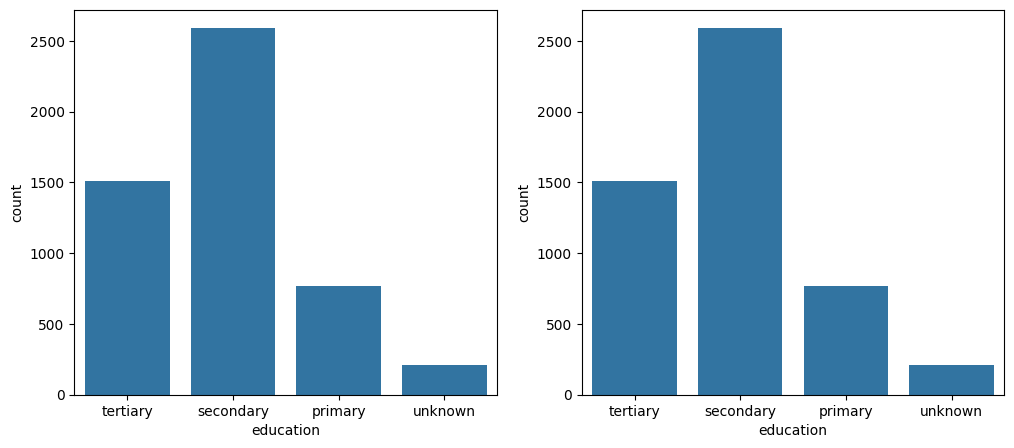

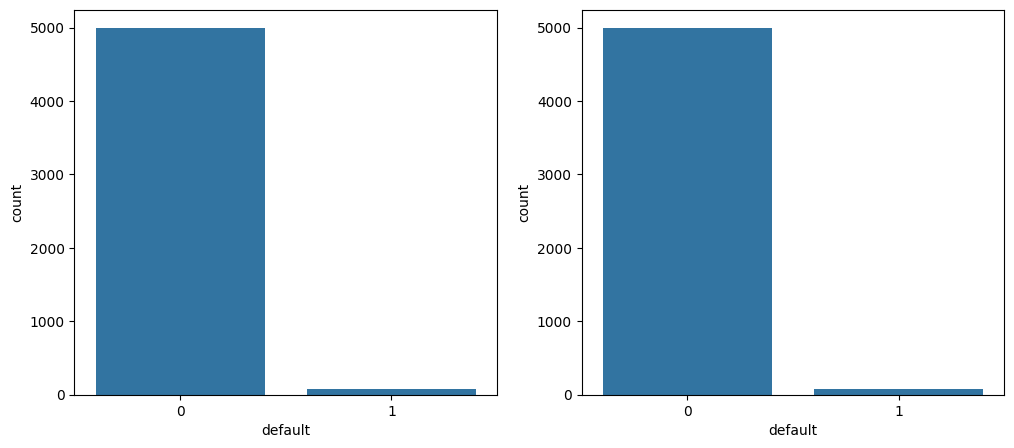

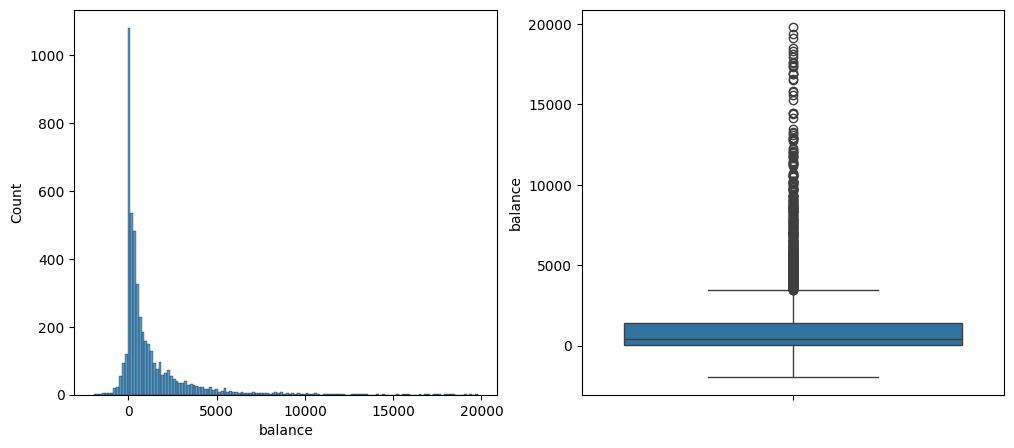

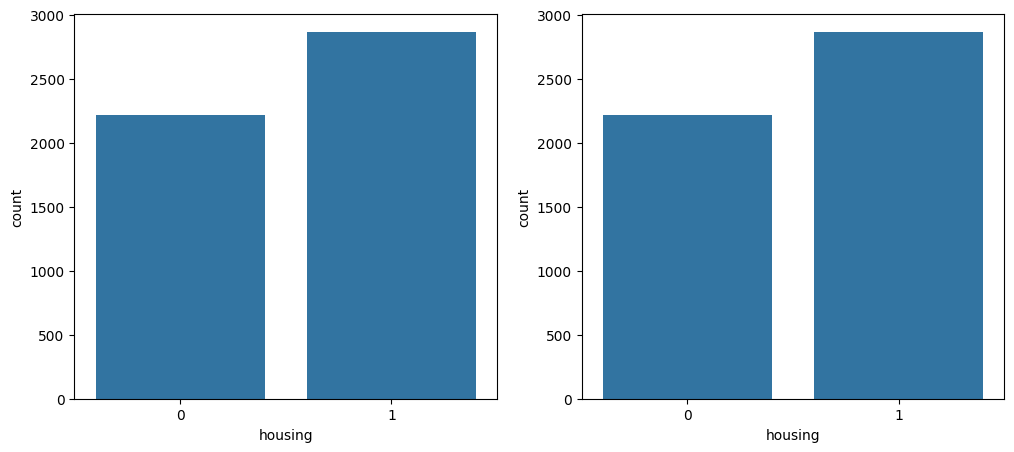

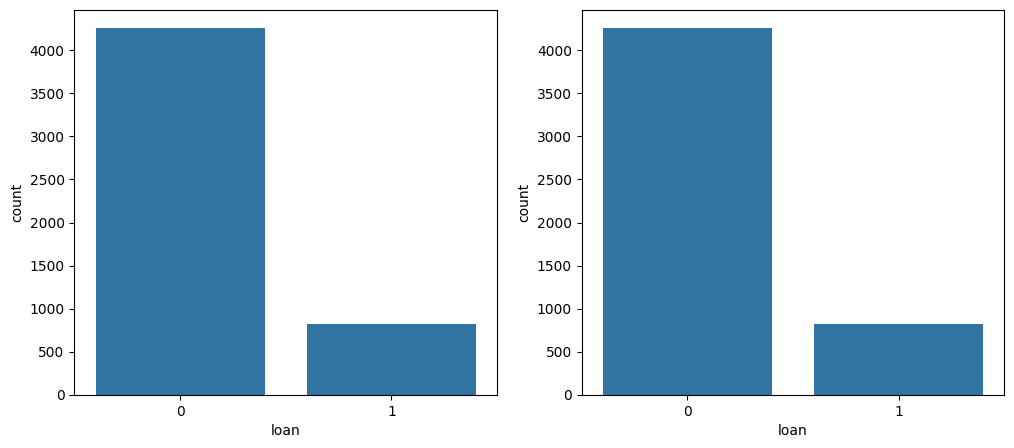

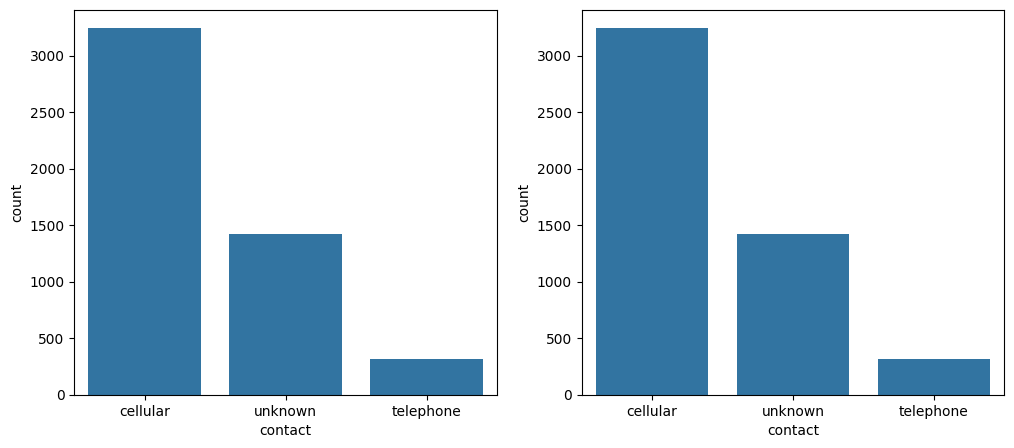

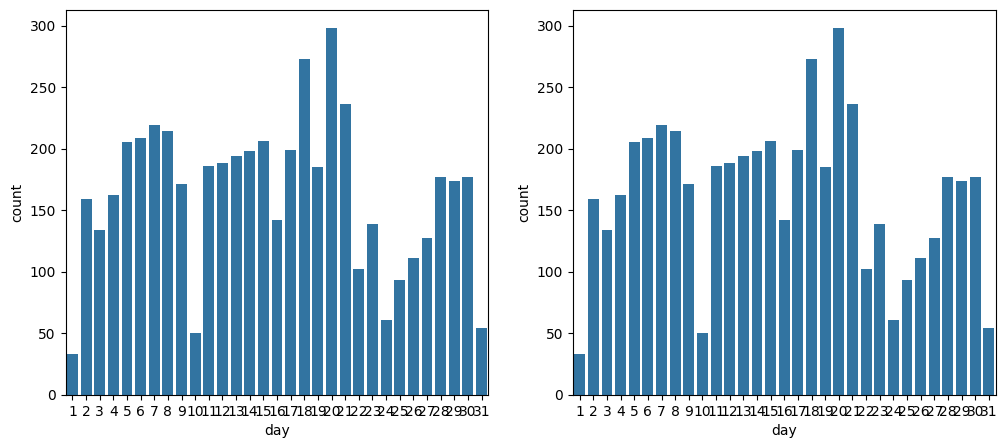

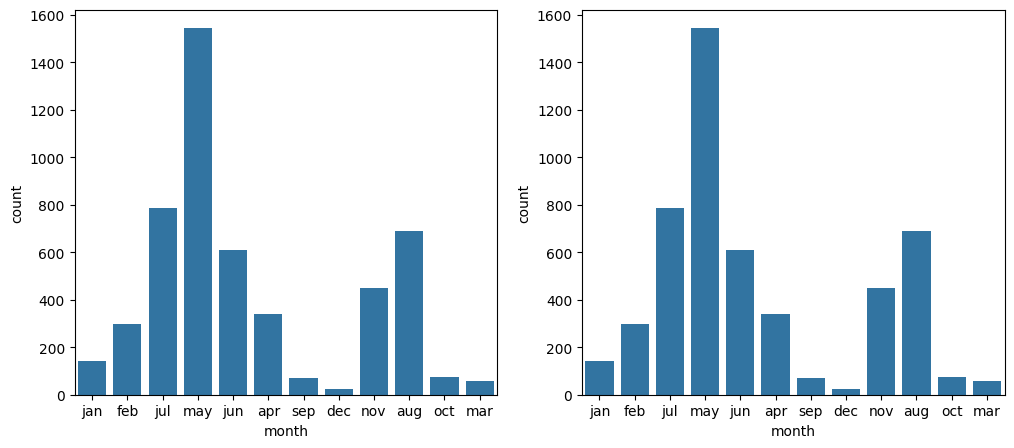

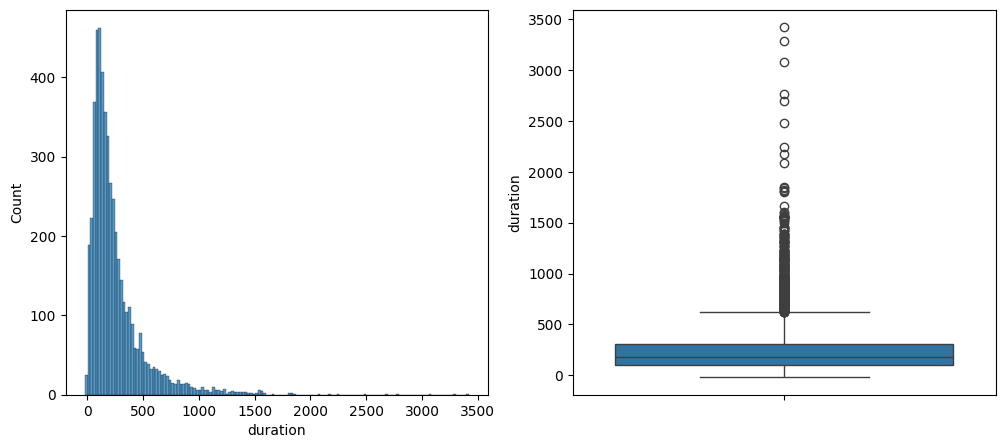

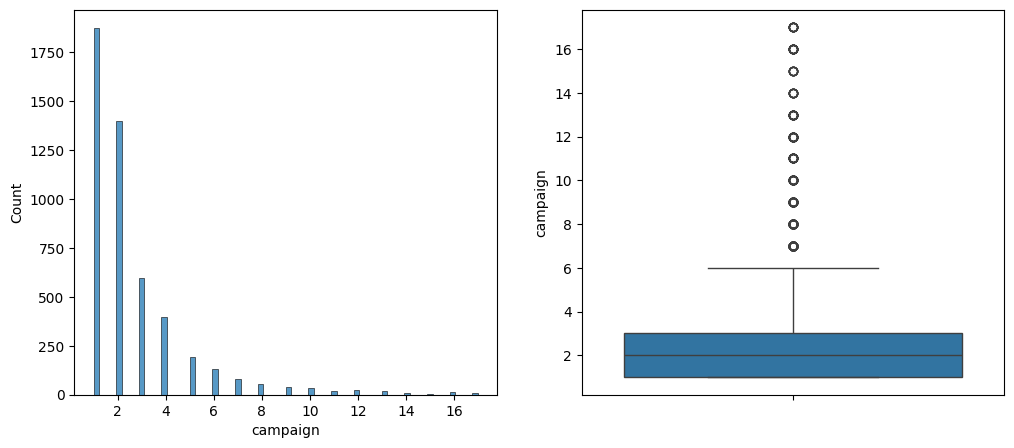

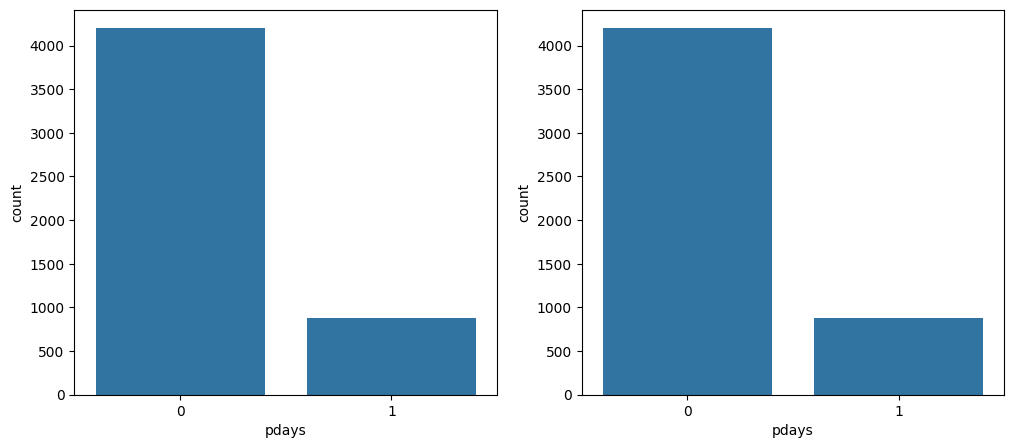

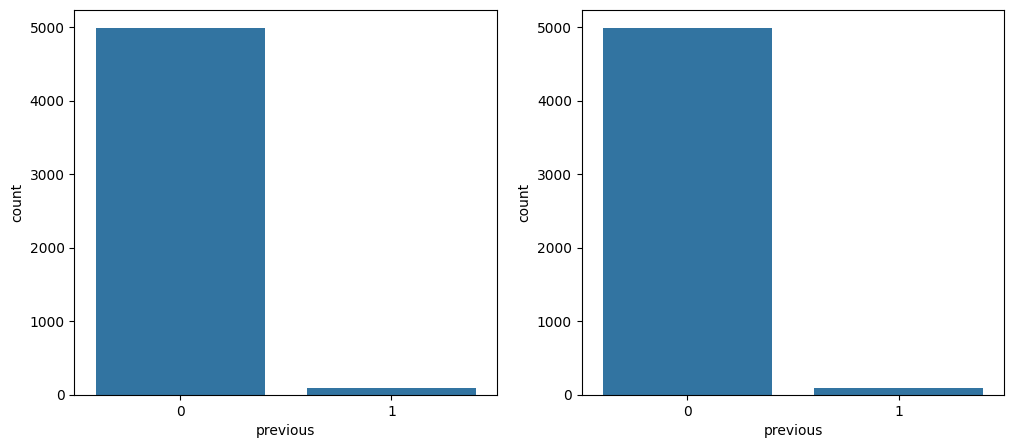

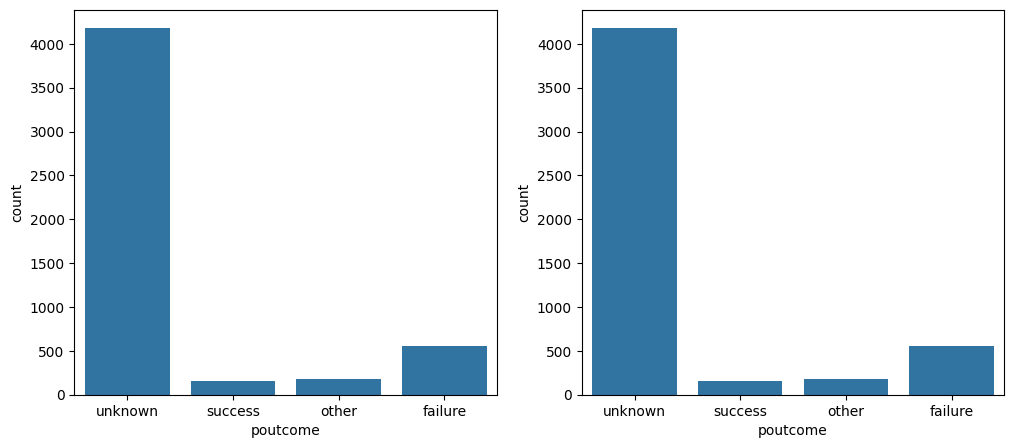

In [70]:
#plotagem de diversos gráficos para a análise exploratória
categoricas = np.array(("marital","education","day","month","pdays","previous","location","default","housing","loan","contact","poutcome"))
numericas = np.array(("age","balance","duration","campaign"))

for feature in (df4.columns):
  if feature in categoricas:
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sns.countplot(data = df4, x = feature)
    plt.subplot(1,2,2)
    sns.countplot(data = df4, x = feature)
    plt.show()
  elif feature in numericas:
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sns.histplot(data = df4, x = feature)
    plt.subplot(1,2,2)
    sns.boxplot(data = df4, y = feature)
    plt.show()

###Lidando com dados ausentes

###Exportando df limpo

In [71]:
df_final = df4.copy()
df_final.to_csv('C:\\Users\\chase\\Documents\\GitHub\\ProjetoFinalTA\\df_teste_final.csv', index=False)